In [1]:
import matplotlib
matplotlib.use('agg')

import xarray as xr
import pyart
pyart.config.get_field_colormap('CZ')
pycm = matplotlib.cm.get_cmap(pyart.config.get_field_colormap('CZ'))


import h5py
import numpy as np
import matplotlib.pyplot as plt

import io

import sys
import os

import glob
import numpy as np
import imp
import sys
#import bottleneck as bn
import oa_stats as OA 
import analysis_tools as AT

import Config

import pickle

import scipy.stats as stats
import scipy
import pandas
import dsd_helper_functions as dfunc
from matplotlib import colors
import matplotlib as mpl
import os
import argparse
import time
from matplotlib.colors import LogNorm

%load_ext autoreload
%autoreload 2


plt.rcParams.update({'font.size': 20})


#sys.setdefaultencoding('utf8')
%matplotlib inline


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/home/bdolan/miniconda3/envs/incus_model/lib/python3.11/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()
/tmp/ipykernel_11290/3249648565.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  pycm = matplotlib.cm.get_cmap(pyart.config.get_field_colormap('CZ'))
/tmp/ipykernel_11290/3249648565.py:21: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  import imp


In [2]:
cfg = Config.Config(f'simulation_settings_baseline_mass.yaml')
ycfg = cfg.v


In [62]:
# #Load all the baseline simulations
alldsd = pickle.load(open( "ramsworld_dsd_baseline3_dm.p", "rb" ) )
pc1 = alldsd.get_pc(rank=1)
pc2 = alldsd.get_pc(rank=2)


eof1 = alldsd.get_eof(rank=1)
eof2 = alldsd.get_eof(rank=2)

alldsd.flip_eof_and_pc(rank=3)
eof3 = alldsd.get_eof(rank=3)


In [4]:

alldsddiam = pickle.load(open( "ramsworld3_dsd_diam.p", "rb" ) )
pc1diam = alldsddiam.get_pc(rank=1)
pc2diam = alldsddiam.get_pc(rank=2)



eof1diam = alldsddiam.get_eof(rank=1)
eof2diam = alldsddiam.get_eof(rank=2)

alldsddiam.flip_eof_and_pc(rank=3)
eofdiam = alldsddiam.get_eof(rank=3)



In [18]:

alldsdmass = pickle.load(open( "ramsworld3_dsd_mass.p", "rb" ) )
pc1mass = alldsdmass.get_pc(rank=1)
pc2mass = alldsdmass.get_pc(rank=2)



eof1mass = alldsdmass.get_eof(rank=1)
eof2mass = alldsdmass.get_eof(rank=2)

alldsdmass.flip_eof_and_pc(rank=3)
eofmass = alldsdmass.get_eof(rank=3)


In [7]:
obsdata = pickle.load(open("world_dsd_NEW_nohiNOGO.p",'rb'),encoding='latin1')
opc1 = obsdata.get_pc(rank=1)
opc2 = obsdata.get_pc(rank=2)


oeof1 = obsdata.get_eof(rank=1)
oeof2 = obsdata.get_eof(rank=2)
oeof3 = obsdata.get_eof(rank=3)



In [20]:
# rvar1 = alldsd.get_variance(rank=1)
# rvar2 = alldsd.get_variance(rank=2)
# rvar3 = alldsd.get_variance(rank=3)


rvar1diam = alldsddiam.get_variance(rank=1)
rvar2diam = alldsddiam.get_variance(rank=2)
rvar3diam =  alldsddiam.get_variance(rank=3)

rvar1mass = alldsdmass.get_variance(rank=1)
rvar2mass = alldsdmass.get_variance(rank=2)
rvar3mass =  alldsdmass.get_variance(rank=3)



In [10]:
ovar1 = obsdata.get_variance(rank=1)
ovar2 = obsdata.get_variance(rank=2)
ovar3 = obsdata.get_variance(rank=3)


# print(f'Variances EOF1: {ovar1} {rvar1} {rvar1n}')
# print(f'Variances EOF1: {ovar2} {rvar2} {rvar2n}')
# print(f'VAriances EOF1: {ovar3} {rvar3} {rvar3n}')

In [11]:
fig_dir = './FINAL'

In [12]:
alldsddiam.eof_labels[5]
alldsddiam.eof_labels[5]='logNt'

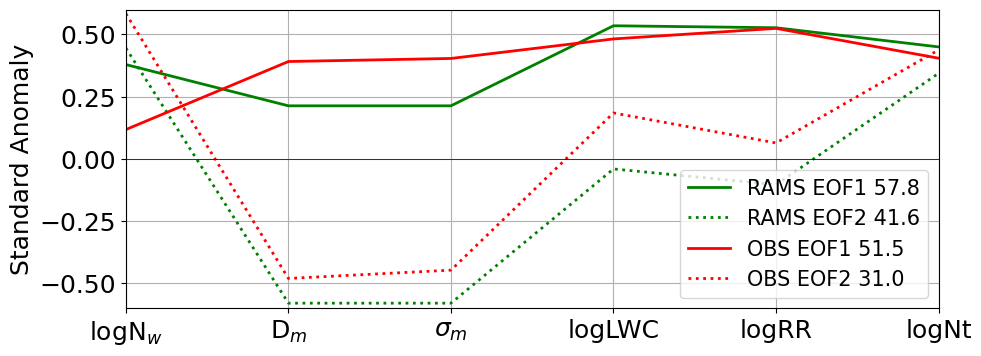

In [21]:
fig, ax = plt.subplots(1,1,figsize=(10,4))
plt.plot(alldsddiam.eof_labels,eof1mass,color='green',label=f'RAMS EOF1 {rvar1diam:.1f}',lw=2)
#plt.plot(alldsdmass.eof_labels,eof1mass,color='purple',label=f'RAMS EOF1 {rvar1:.1f}')

plt.plot(alldsddiam.eof_labels,eof2mass,color='green',label=f'RAMS EOF2 {rvar2diam:.1f}',ls=':',lw=2)
#plt.plot(alldsdmass.eof_labels,eof2mass,color='green',label=f'RAMS EOF2 {rvar1:.1f}',ls=':')

#plt.plot(alldsd.eof_labels,eof2,color='green',ls=':',label=f'RAMS EOF2 {rvar2:.1f}')
#plt.plot(alldsd.eof_labels,eof3,color='green',ls='-.')


plt.plot(alldsddiam.eof_labels,oeof1,color='red',label=f'OBS EOF1 {ovar1:.1f}',lw=2)
plt.plot(alldsddiam.eof_labels,oeof2,color='red',ls=':',label=f'OBS EOF2 {ovar2:.1f}',lw=2)
#plt.plot(alldsd.eof_labels,oeof3,color='red',ls='-.')


plt.ylabel('Standard Anomaly')
plt.axhline(0,color='k',ls='-',lw=0.5)
plt.legend()
#plt.plot(-1,-10,ls='-',color='k',label='EOF1')
#plt.plot(-1,-10,ls=':',color='k',label='EOF2')
plt.xlim(0,5)
plt.ylim(-0.6,0.6)
plt.grid()
plt.legend(fontsize=15)
#plt.title(f'Variance Explained: EOF1 OBS {ovar1:.1f} RAMS {rvar1:.1f} ')
plt.tight_layout()
plt.savefig(f"{fig_dir}EOF12_RAMS_OBS_revised_mass.png",dpi=300,bbox_inches='tight',facecolor='white')

In [22]:
rthresh = 0.9
ramsgroups1diam = dfunc.get_groups(pc1diam,pc2diam,rthresh,rthresh,rthresh,rthresh)
ramsvals1diam = dfunc.make_groups(pc1diam,ramsgroups1diam)


ramsgroups1mass = dfunc.get_groups(pc1mass,pc2mass,rthresh,rthresh,rthresh,rthresh)
ramsvals1mass = dfunc.make_groups(pc1mass,ramsgroups1mass)




good_vars = ['nww', 'd00', 'sigm', 'llwc', 'lrr', 'lnt']


In [23]:
thresh = 0.9
#thresh1=0.8
obsgroups1 = dfunc.get_groups(opc1,opc2,thresh,thresh,thresh,thresh)
obsvals1 = dfunc.make_groups(opc1,obsgroups1)


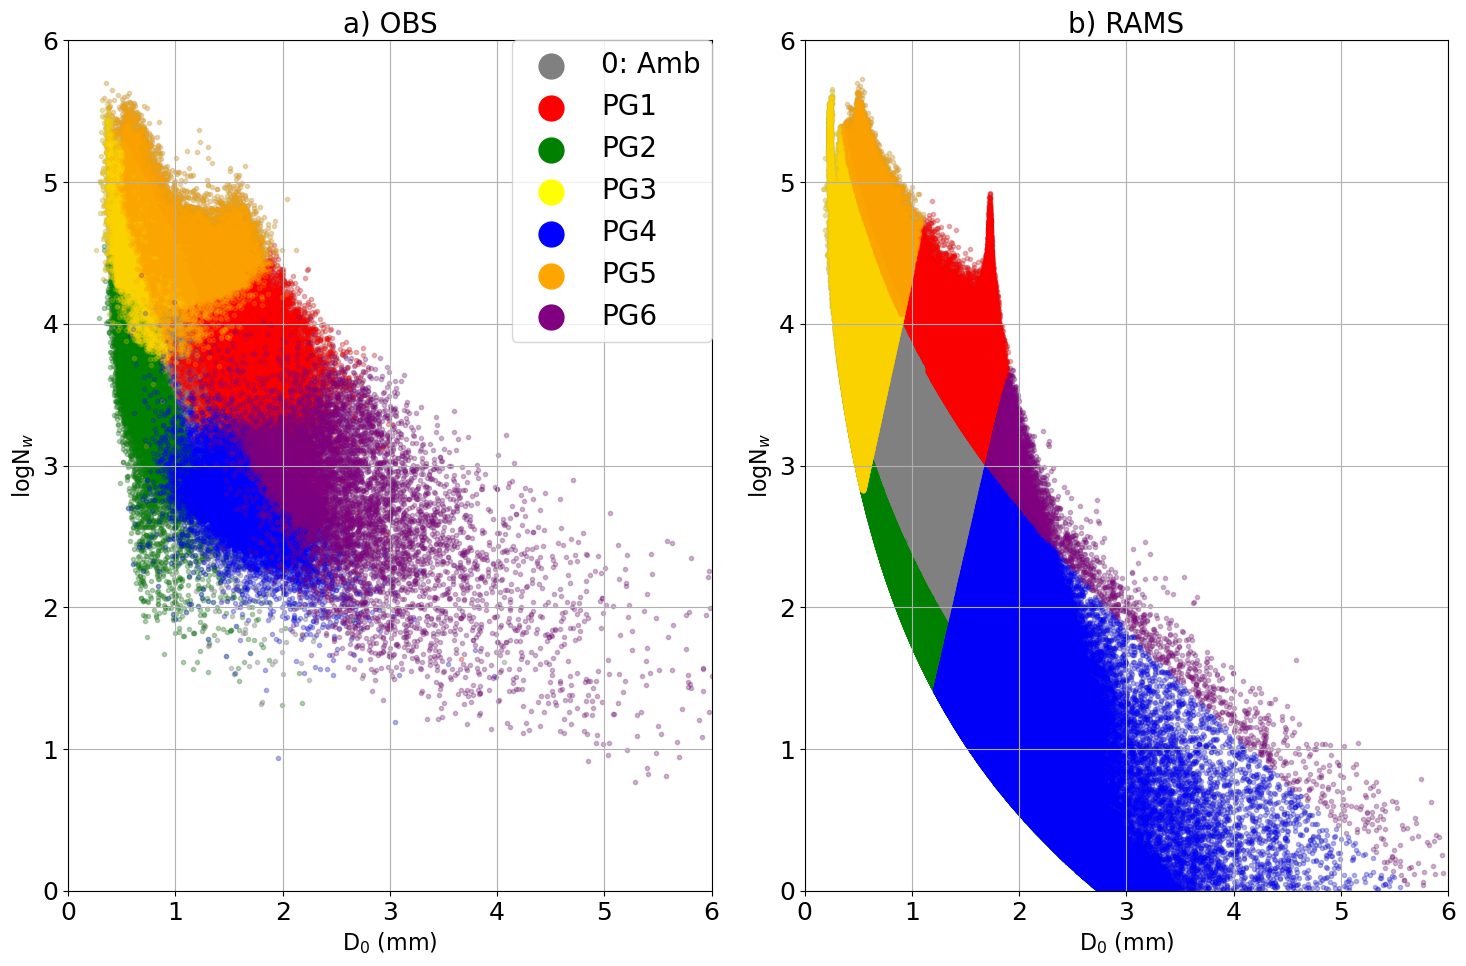

In [24]:
fig, ax = plt.subplots(1,2,figsize=(15,10))
axf=ax.flatten()
i=0
axf[i].scatter(-1,-1,color='gray',s=80,label='0: Amb')
plt.rcParams.update({'font.size': 18})

axf[i].scatter(-1,-1,color='r',s=80,label='PG1')
axf[i].scatter(-1,-1,color='g',s=80,label='PG2')
axf[i].scatter(-1,-1,color='yellow',s=80,label='PG3')
axf[i].scatter(-1,-1,color='blue',s=80,label='PG4')
axf[i].scatter(-1,-1,color='orange',s=80,label='PG5')
axf[i].scatter(-1,-1,color='purple',s=80,label='PG6')
axf[i].legend(loc=0,
     borderaxespad=0.,fontsize=20,scatterpoints=1,markerscale=2)#,mode='expand')#ld.set_title('Groups')



dfunc.plot_groups(obsdata.data['d00'],np.log10(obsdata.data['nww']),obsgroups1,axf[0])#f[0])
axf[0].set_title('{e}'.format(e='a) OBS'),fontsize=20)
axf[0].set_xlim(0,6)
axf[0].set_ylim(0,6)
axf[0].set_xlabel('D$_0$ (mm)',fontsize=16)
axf[0].set_ylabel('logN$_w$',fontsize=16)
axf[0].grid()


axf[1].set_title('{e}'.format(e=f'b) RAMS'),fontsize=20)
axf[1].set_xlim(0,6)
axf[1].set_ylim(0,6)
axf[1].set_xlabel('D$_0$ (mm)',fontsize=16)
axf[1].set_ylabel('logN$_w$',fontsize=16)

#ld = fig.legend(handles,labels,bbox_to_anchor=(0., -0.02, 1., -0.102),mode='expand',fontsize=18,ncol=3)
for a in axf:
    a.tick_params(axis='x', labelsize=18)
    a.tick_params(axis='y', labelsize=18)


#dfunc.plot_groups(alldsd.data['d00'],(alldsd.data['nww']),ramsgroups1,axf[1])#f[0])
dfunc.plot_groups(alldsdmass.data['d00'],(alldsdmass.data['nww']),ramsgroups1mass,axf[1])#f[0])

axf[1].grid()

#axf[1].legend(loc='upper right',markerscale=3)

plt.tight_layout()
plt.savefig(f'{fig_dir}OBS_{thresh}_RAMS_{rthresh}_orig_D0-Nw_baseline_mass.png',dpi=400,bbox_inches='tight',facecolor='white')

In [31]:
totm=[]
for j in range(0,7):
    try:
        v= len(np.squeeze(np.where(np.ma.ravel(obsgroups1)==j)))
    except TypeError as tp:
        print( tp)
        v = 0
    totm.append(float(v))
#print totm
totmsum =float(np.sum(np.array(totm)))

In [32]:
ramsvals1mass

array([2., 3., 3., ..., 3., 3., 3.])

In [33]:
obsG1 = len(np.squeeze(obsgroups1['Group1']))
ramsG1 = len(np.squeeze(ramsgroups1mass['Group1']))

obsG2 = len(np.squeeze(obsgroups1['Group2']))
ramsG2 = len(np.squeeze(ramsgroups1mass['Group2']))

obsG3 = len(np.squeeze(obsgroups1['Group3']))
ramsG3 = len(np.squeeze(ramsgroups1mass['Group3']))

obsG4 = len(np.squeeze(obsgroups1['Group4']))
ramsG4 = len(np.squeeze(ramsgroups1mass['Group4']))

obsG5 = len(np.squeeze(obsgroups1['Group5']))
ramsG5 = len(np.squeeze(ramsgroups1mass['Group5']))

obsG6 = len(np.squeeze(obsgroups1['Group6']))
ramsG6 = len(np.squeeze(ramsgroups1mass['Group6']))

obsGA = len(np.squeeze(obsgroups1['Amb']))
ramsGA = len(np.squeeze(ramsgroups1mass['Amb']))




In [34]:
obstot = obsG1+obsG2+obsG3+obsG4+obsG5+obsG6+obsGA
ramstot = ramsG1+ramsG2+ramsG3+ramsG4+ramsG5+ramsG6+ramsGA

In [38]:
alldsdmass.data['nww']

array([2.7117, 3.7616, 3.5171, ..., 4.1674, 3.8999, 3.2736], dtype=float32)

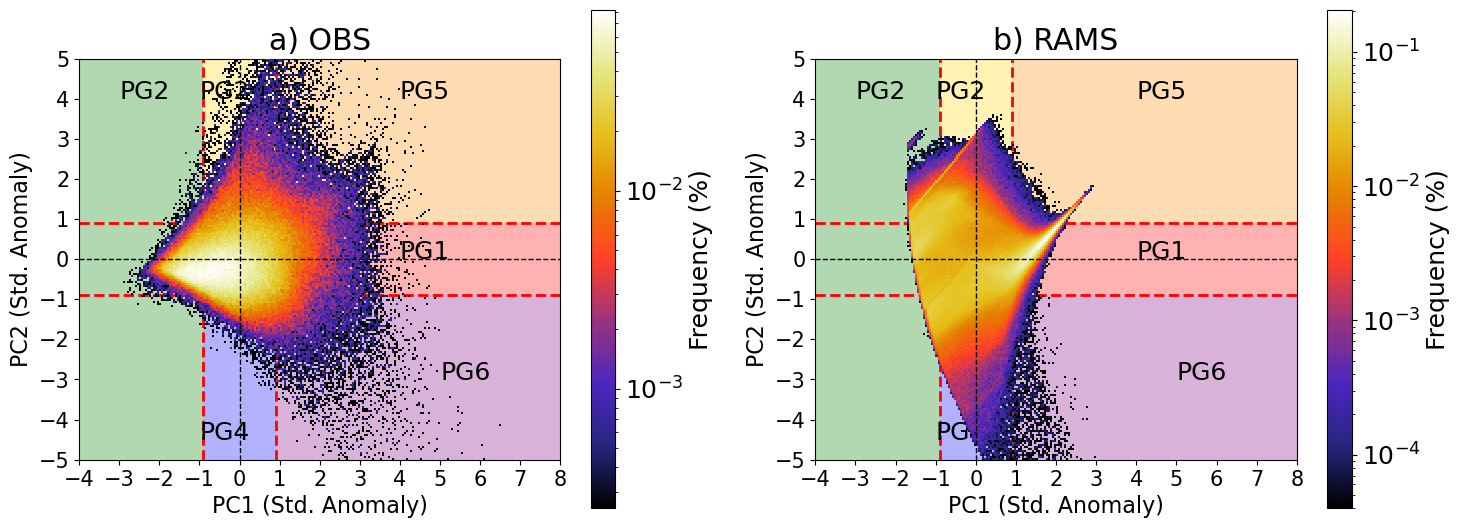

In [50]:
fig, ax = plt.subplots(1,2,figsize=(15,13))
axf = ax.flatten()
tst = dfunc.get_2d_pchist(opc1,opc2,'obs',axf[0],thresh=thresh)



axf[0].set_title('a) OBS')

tst2 = dfunc.get_2d_pchist(pc1,pc2,'rams',axf[1], thresh=rthresh)
axf[1].set_title('b) RAMS')


for a in axf:
    a.text(4,4,'PG5')
    a.text(-3,4,'PG2')
    a.text(-1,-4.5,'PG4')
    a.text(5,-3,'PG6')
    a.text(4,0,'PG1')
    a.text(-1,4,'PG2')

plt.tight_layout()

plt.savefig(f'{fig_dir}PC1PC2_obs_rams_{thresh}.png',dpi=300,bbox_inches='tight',facecolor='white')




In [ ]:
#exper

In [53]:
exper = np.unique(obsdata.data['exper'])

econtribution = {}
for e in exper:
    whe = np.squeeze(np.where(obsdata.data['exper']==e))
    econtribution[e]=np.shape(whe)
    
    
experiments_ordered4 = ['hymex','iphex','ifloods','mc3e','sgp','hunt','wallops15','wallops13','darwin','twpice','GOAMLAS','MANNU','gan','ena']



##FOR THE MOMENT FIN, lpvexn, olympex remain unclassified in this 4-class system

midlat_cont = np.squeeze(econtribution['hymex'])+np.squeeze(econtribution['iphex'])+np.squeeze(econtribution['ifloods'])+np.squeeze(econtribution['mc3e'])+np.squeeze(econtribution['sgp'])+np.squeeze(econtribution['hunt'])+np.squeeze(econtribution['wallops13'])+np.squeeze(econtribution['wallops15'])
trop_cont = np.squeeze(econtribution['darwin'])+np.squeeze(econtribution['twpice'])+np.squeeze(econtribution['GOAMLAS'])
trop_ocean = np.squeeze(econtribution['MANNU'])+np.squeeze(econtribution['gan'])#+np.squeeze(econtribution[''])
midlat_ocean = np.squeeze(econtribution['ena'])


econtribution4 = {}
for e in experiments_ordered4:
    whe = np.squeeze(np.where(obsdata.data['exper']==e))
    econtribution4[e]=np.shape(whe)




tcolors4 = ['orange','violet','skyblue','palegreen']

In [54]:
sizes4 = [econtribution4[_] for _ in experiments_ordered4]
sizes_type4 = [midlat_cont,trop_cont,trop_ocean,midlat_ocean]

dis_types4= {'midlat_cont':[],'trop_cont':[],'trop_ocean':[],'midlat_ocean':[]}

dis_types4['midlat_cont'] = ['hymex','iphex','ifloods','mc3e','sgp','hunt','wallops13','wallops15']
dis_types4['trop_cont'] = ['darwin','twpice','goamazon']
dis_types4['trop_ocean'] = ['MANNU','gan']
dis_types4['midlat_ocean'] =['ena']

types4_long =['Mid-latitude Continental','Tropical Continental','Tropical Ocean','Mid-latitude Ocean']

In [55]:
mtypes = {'midlat_cont':[],'trop_cont':[],'trop_ocean':[],'midlat_ocean':[]}

mtypes4 = mtypes
for t in ycfg['sims'].keys():
    #print(ycfg['sims'][t]['type'])
    #print(type(ycfg['sims'][t]['type']))
    stype = ycfg['sims'][t]['type']
    if stype == 'TO':
        mtypes['trop_ocean'].append(t)
    if stype == 'MO':
        mtypes['midlat_ocean'].append(t)
    if stype == 'MC':
        mtypes['midlat_cont'].append(t)
    if stype == 'TC':
        mtypes['trop_cont'].append(t)



In [57]:
exper_dsd_data=pickle.load(open('ramsworld_dsd_baseline3_dm_byexper_2.p','rb'))

In [59]:
        
msize4 = {}
plotsize4=[]
for t in mtypes4.keys():
    mtot=0
    for m in mtypes4[t]:
        dum = exper_dsd_data[m]
        dum = dfunc.remove_bad(dum)
        dum = dfunc.remove_bad(dum,rainvar='lnt')


        msz = len(dum['lwcc'])
        print(msz,m)
        mtot = mtot+msz
    msize4[t]= mtot
    plotsize4.append(mtot)

78780 supercell_nu2
2898766 MC3E
883179 seabreezectl
618770 seabreezepoll
59107 NAMMA_nodust
58757 NAMMA_dustin
58521 NAMMA_ccnin
36841 BSISO1
52646 BSISO2
30031 BSISO6
96342 BSISO8
478898 tropconvlin
329166 tropconvclst
25073 atex_nu2


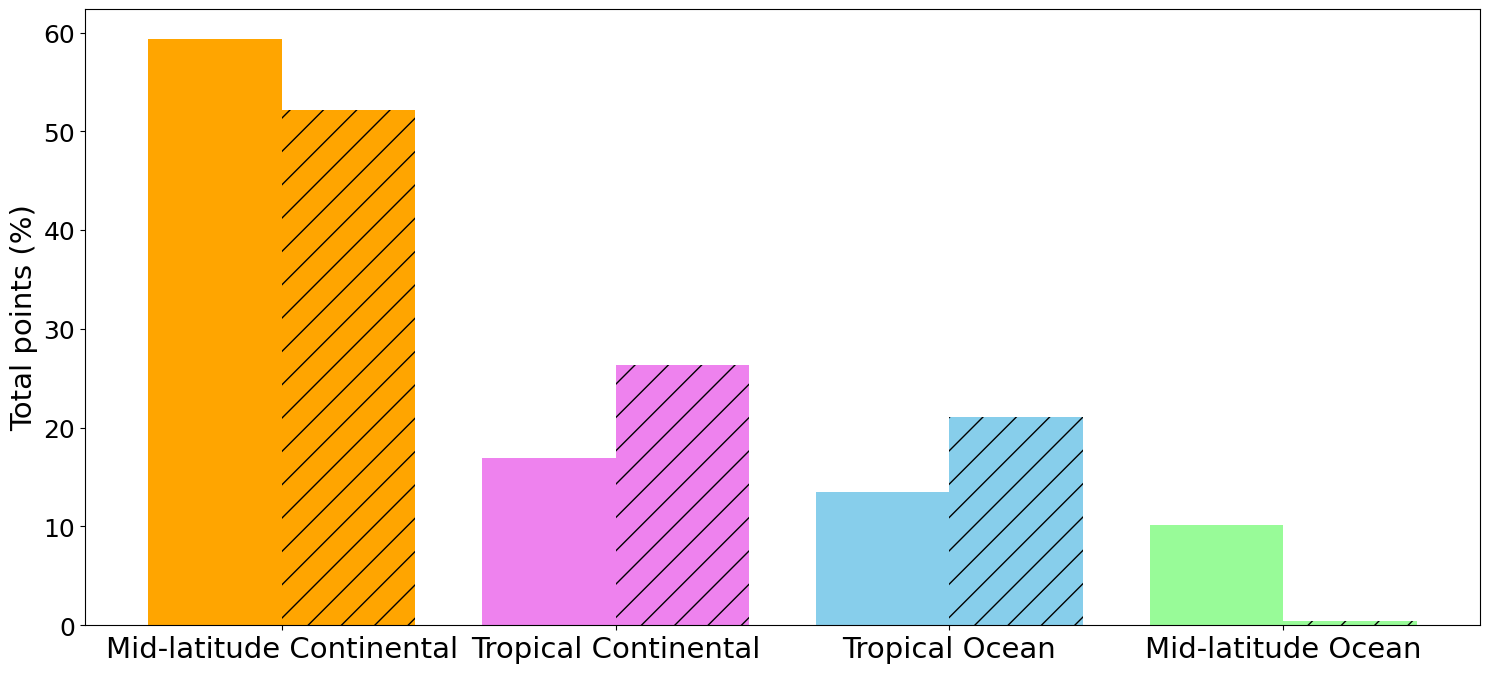

In [61]:
fig, ax= plt.subplots(1,1, figsize=(18,8))

plt.bar([1,2,3,4],sizes_type4/np.sum(sizes_type4).astype('float64')*100.,width=0.4,color=tcolors4)
plt.bar([1.4,2.4,3.4,4.4],plotsize4/np.sum(plotsize4).astype('float64')*100.,width=0.4,color=tcolors4,hatch='/')
#plt.title("Distribution of points by type hatched=RAMS,solid = OBS",fontsize=18)
plt.xticks([1.2,2.2,3.2,4.2],types4_long,rotation=0,fontsize=21)
plt.ylabel('Total points (%)',fontsize=21)
#plt.tight_layout()
plt.savefig(f'{fig_dir}RAMS_OBS_Baseline_bar_point_4_new.png',dpi=300,bbox_inches='tight')